## Recognizing Sporting Activities From Sensor Readings
Using the provided sporting activities dataset, the task will be to create a model that can be used to recognize sitting activity from sensors readings
1. Load the dataset.
1. Viewing the Dataset
1. Splitting the dataset to a training and validation set
1. Performing a ridge regression and getting the area under the curve
1. Applying a Principal Component analysis investigating the effect of principal components
1. Using Recursive Feature Elimination and getting the area under the curve

In [23]:
# import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import decomposition
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

# set configuration

np.random.seed(47)

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 150

# import additional packages for grading

import sys, os
from IPython.display import Image

In [24]:

sporting_data= pd.read_csv('s01.txt', sep=",", header=None)

sporting_data


0       1       2         3         4         5        6   ...  \
0    8.1305  1.0349  5.4217 -0.009461  0.001915 -0.003424 -0.78712  ...   
1    8.1305  1.0202  5.3843 -0.009368  0.023485  0.001953 -0.78717  ...   
2    8.1604  1.0201  5.3622  0.015046  0.014330  0.000204 -0.78664  ...   
3    8.1603  1.0052  5.3770  0.006892  0.018045  0.005649 -0.78529  ...   
4    8.1605  1.0275  5.3473  0.008811  0.030433 -0.005346 -0.78742  ...   
..      ...     ...     ...       ...       ...       ...      ...  ...   
120  7.9515  1.1242  5.6378 -0.010269  0.023425 -0.009024 -0.79241  ...   
121  7.9442  1.1466  5.6080  0.006786  0.001938  0.002946 -0.79034  ...   
122  7.9517  1.1466  5.6081  0.000527  0.023588  0.010141 -0.79174  ...   
123  7.9743  1.1542  5.5038  0.025818  0.005417  0.006603 -0.79166  ...   
124  7.9812  1.0945  5.6005 -0.005819  0.016371  0.002868 -0.79209  ...   

         38        39        40        41       42       43        44  
0    2.6220 -0.000232 -0.012092 -0.004457  0.74017  0.30053 -0.057730  
1    2.6218 -0.014784 -0.016477  0.002789  0.73937  0.30183 -0.057514  
2    2.6366 -0.012770  0.005717 -0.007918  0.73955  0.30052 -0.057219  
3    2.6070 -0.005725  0.009620  0.006555  0.74029  0.30184 -0.057750  
4    2.6218 -0.003929 -0.008371  0.002816  0.73845  0.30090 -0.057527  
..      ...       ...       ...       ...      ...      ...       ...  
120  2.6100 -0.000123 -0.002476 -0.021531  0.73889  0.30092 -0.057689  
121  2.6247  0.001349  0.006134  0.004760  0.73996  0.30132 -0.057530  
122  2.6247 -0.005735 -0.001302 -0.007031  0.73945  0.30342 -0.056789  
123  2.6246 -0.020267  0.000585  0.000255  0.74030  0.30027 -0.056704  
124  2.6025 -0.003904 -0.006729 -0.009789  0.73897  0.30275 -0.056262  

[125 rows x 45 columns]

## Exploratory Data Analysis

In [25]:
sporting_data.describe()

0           1           2           3           4           5   \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean     7.975714    1.083150    5.606846    0.004897    0.026123   -0.003726   
std      0.119981    0.046987    0.181035    0.015592    0.036279    0.007920   
min      7.682300    0.997440    5.316900   -0.039399   -0.080639   -0.030754   
25%      7.876300    1.035000    5.436400   -0.005710    0.010725   -0.008867   
50%      7.958700    1.080700    5.608100    0.005122    0.023588   -0.003457   
75%      8.108200    1.124000    5.749300    0.014090    0.043022    0.001953   
max      8.160500    1.183200    6.181400    0.045403    0.214760    0.015614   

               6   ...          38          39          40          41  \
count  125.000000  ...  125.000000  125.000000  125.000000  125.000000   
mean    -0.790726  ...    2.618207   -0.005036    0.002166   -0.003155   
std      0.002870  ...    0.018793    0.007633    0.007310    0.007074   
min     -0.795540  ...    2.571100   -0.024685   -0.019207   -0.021531   
25%     -0.793210  ...    2.608400   -0.009489   -0.003025   -0.007918   
50%     -0.791610  ...    2.622000   -0.005644    0.001586   -0.002558   
75%     -0.787430  ...    2.625000   -0.000232    0.007598    0.001253   
max     -0.785290  ...    2.669600    0.015853    0.020288    0.013777   

               42          43          44  
count  125.000000  125.000000  125.000000  
mean     0.739615    0.301314   -0.057119  
std      0.000850    0.000792    0.000823  
min      0.737520    0.299680   -0.059241  
25%      0.739000    0.300710   -0.057598  
50%      0.739550    0.301320   -0.057208  
75%      0.740240    0.301830   -0.056500  
max      0.742380    0.303420   -0.054963  

[8 rows x 45 columns]

## Split the Dataset to a training and validation set

In [46]:


X=sporting_data
Y=sporting_data

RANDOM_STATE = 47

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = RANDOM_STATE) 


sporting_data.dropna()

0       1       2         3         4         5        6   ...  \
0    8.1305  1.0349  5.4217 -0.009461  0.001915 -0.003424 -0.78712  ...   
1    8.1305  1.0202  5.3843 -0.009368  0.023485  0.001953 -0.78717  ...   
2    8.1604  1.0201  5.3622  0.015046  0.014330  0.000204 -0.78664  ...   
3    8.1603  1.0052  5.3770  0.006892  0.018045  0.005649 -0.78529  ...   
4    8.1605  1.0275  5.3473  0.008811  0.030433 -0.005346 -0.78742  ...   
..      ...     ...     ...       ...       ...       ...      ...  ...   
120  7.9515  1.1242  5.6378 -0.010269  0.023425 -0.009024 -0.79241  ...   
121  7.9442  1.1466  5.6080  0.006786  0.001938  0.002946 -0.79034  ...   
122  7.9517  1.1466  5.6081  0.000527  0.023588  0.010141 -0.79174  ...   
123  7.9743  1.1542  5.5038  0.025818  0.005417  0.006603 -0.79166  ...   
124  7.9812  1.0945  5.6005 -0.005819  0.016371  0.002868 -0.79209  ...   

         38        39        40        41       42       43        44  
0    2.6220 -0.000232 -0.012092 -0.004457  0.74017  0.30053 -0.057730  
1    2.6218 -0.014784 -0.016477  0.002789  0.73937  0.30183 -0.057514  
2    2.6366 -0.012770  0.005717 -0.007918  0.73955  0.30052 -0.057219  
3    2.6070 -0.005725  0.009620  0.006555  0.74029  0.30184 -0.057750  
4    2.6218 -0.003929 -0.008371  0.002816  0.73845  0.30090 -0.057527  
..      ...       ...       ...       ...      ...      ...       ...  
120  2.6100 -0.000123 -0.002476 -0.021531  0.73889  0.30092 -0.057689  
121  2.6247  0.001349  0.006134  0.004760  0.73996  0.30132 -0.057530  
122  2.6247 -0.005735 -0.001302 -0.007031  0.73945  0.30342 -0.056789  
123  2.6246 -0.020267  0.000585  0.000255  0.74030  0.30027 -0.056704  
124  2.6025 -0.003904 -0.006729 -0.009789  0.73897  0.30275 -0.056262  

[125 rows x 45 columns]

## Perform a Ridge Regression and Get Area Under the Curve

In [47]:
ridge= Ridge()
ridge.fit(np.array(X_train),np.array(Y_train))
Y_pred = ridge.predict(X_test)
y_pred=Y_pred
y_test=Y_test

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)





ValueError: continuous-multioutput format is not supported

## Apply Principal Component Analysis

In [418]:
pcacomponent =decomposition.PCA(n_components = 0) 
pca.fit(X_train)

#calculate variance ratios
varianceratios=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)


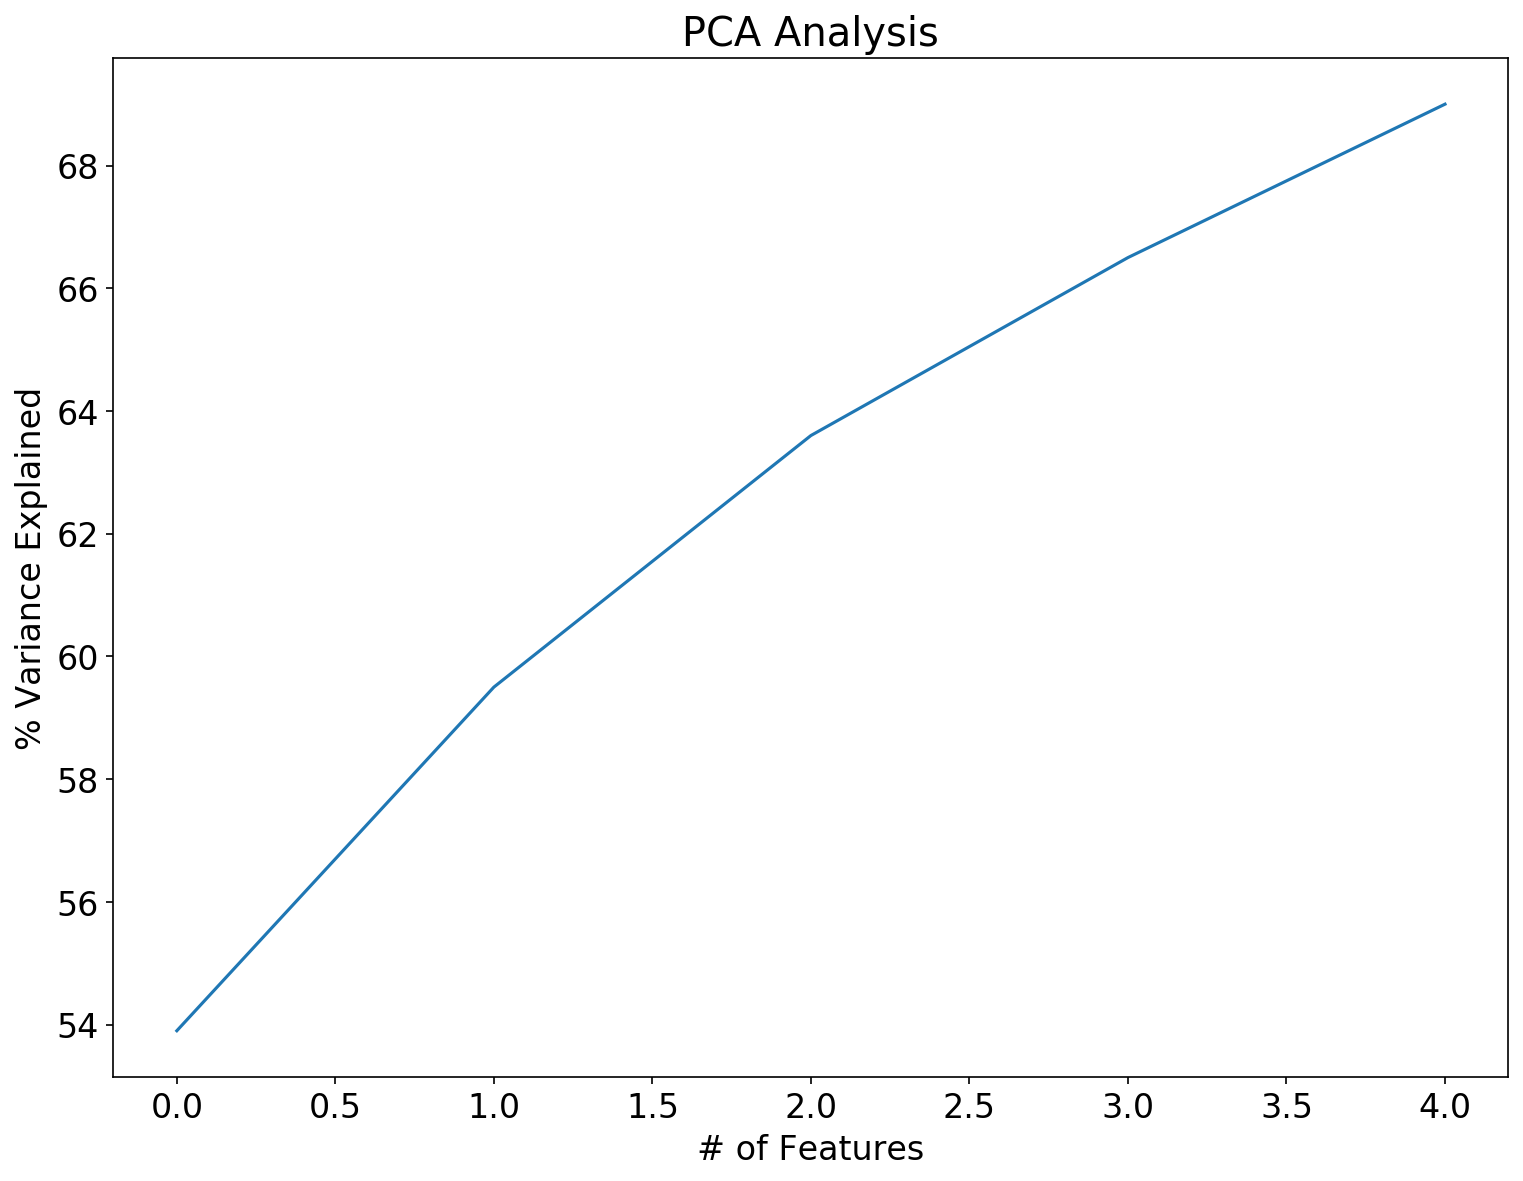

In [419]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(varianceratios)

## Feature selection using a Recursive Feature Elimination, K-Fold, Mean Square Error Model

In [420]:
features=list(Smartphone_Xtrain.columns.values)

feature_sets=[features[:15],features[15:30],features[30:45],features[45:60],features[60:75],features[75:90],
              features[90:105],features[105:120],features[120:135],features[135:150],features[150:165],features[165:178]
             ]




In [424]:
def RFE_feature_selection(best_feature_set):
    model = LogisticRegression()
    rfe = RFE(model, 15)
    return best_feature_set
    

In [425]:
best_feature_set=RFE_feature_selection(best_feature_set)

In [426]:
for index in indices:
    if min(errors) in index:
        best_feature_set=feature_sets[indexerror[0]]


In [427]:
best_feature_set

['tBodyGyroJerk-std()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Y',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-max()-X',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-max()-Z',
 'tBodyGyroJerk-min()-X',
 'tBodyGyroJerk-min()-Y',
 'tBodyGyroJerk-min()-Z',
 'tBodyGyroJerk-sma()',
 'tBodyGyroJerk-energy()-X',
 'tBodyGyroJerk-energy()-Y']

## Ridge Regression using the Selected features and getting Area Under the Curve

In [428]:
logreg = LogisticRegression(solver='liblinear', random_state=0).fit(X_train[best_feature_set], Y_train.values.ravel())
Y_pred = logreg.predict(X_test[best_feature_set])
y_pred=Y_pred
y_test=Y_test
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)



0.2590406226769863